In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/car_price - car_price.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11,MARUTI,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7,HYUNDAI,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13,HYUNDAI,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11,MARUTI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8,FORD,0,0,1,0,0,0,1,1,0


In [3]:
df1 = df.copy()

In [4]:
df.groupby("make").agg({"selling_price":'mean'}) #intermediate code for next code just to aggregate

,selling_price
make,
AMBASSADOR,1.452500
AUDI,17.177585
BENTLEY,20.902500
BMW,17.349017
CHEVROLET,2.723621
DAEWOO,0.780000
DATSUN,3.205176
DC,11.925000
FERRARI,20.902500


In [5]:
df1.loc[:,"make"]=df1.groupby(["make"])["selling_price"].transform("mean")

In [6]:
df1.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11,4.684721,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7,5.458819,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13,5.458819,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11,4.684721,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8,5.858258,0,0,1,0,0,0,1,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y=df1["selling_price"]
df1.drop(columns=["selling_price"],inplace=True)

In [9]:
X_train,X_test,y_train,y_test= train_test_split(df1,y,test_size=0.2,random_state=10)

In [10]:
X_train

,km_driven,mileage,engine,max_power,age,make,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
19738,90000,12.99,2494.0,100.60,7,10.532763,0,0,1,0,0,0,1,0,1
17034,62904,28.40,1248.0,74.00,6,4.684721,0,0,1,0,0,0,1,1,0
17080,78368,20.77,1248.0,88.76,8,4.684721,0,0,1,0,0,0,1,0,1
7420,20000,20.62,1198.0,67.00,7,3.205176,1,0,0,0,0,1,1,0,1
15375,74000,16.80,1497.0,116.30,6,5.979902,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,180000,17.00,1497.0,118.00,13,5.979902,1,0,0,0,0,1,1,1,0
7291,37650,21.79,998.0,67.05,5,4.684721,0,0,0,0,0,1,1,1,0
17728,38000,22.54,1396.0,88.76,5,5.458819,0,0,1,0,0,0,1,1,0
7293,70123,19.10,1197.0,85.80,9,4.684721,0,0,0,0,0,1,1,1,0


In [11]:
X_test

,km_driven,mileage,engine,max_power,age,make,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3386,60000,15.00,1586.0,104.68,13,4.684721,0,0,0,0,0,1,1,1,0
11664,27120,23.84,1199.0,84.00,5,4.381194,0,0,0,0,0,1,1,1,0
7327,48000,15.04,2755.0,174.50,4,10.532763,1,0,1,0,0,0,0,0,1
17993,26000,15.90,1496.0,120.69,6,5.858258,0,0,0,0,0,1,1,1,0
19419,59962,18.00,1198.0,86.70,8,5.979902,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,98000,21.40,1197.0,83.10,7,4.684721,0,0,0,0,0,1,0,1,0
3172,78245,16.10,796.0,37.00,15,4.684721,0,0,0,0,0,1,1,0,0
18409,19000,21.72,1498.0,108.60,5,7.182097,0,0,1,0,0,0,0,1,0
4699,61000,20.88,1196.0,61.70,8,4.684721,0,0,0,0,0,0,1,1,0


In [12]:
y_train

19738    9.45
17034    7.00
17080    7.85
7420     3.50
15375    8.50
         ... 
9372     4.00
7291     4.70
17728    8.75
7293     4.45
17673    7.75
Name: selling_price, Length: 15856, dtype: float64

In [13]:
y_test

3386      2.6000
11664     4.6000
7327     20.9025
17993     7.2500
19419     3.8900
          ...   
5241      5.7500
3172      0.5000
18409     9.6000
4699      3.9000
1033      6.5000
Name: selling_price, Length: 3964, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([-5.44228049e-06, -1.06038455e-01,  2.48917219e-04,  3.12298214e-02,
       -5.43765388e-01,  4.89599119e-01, -2.55968469e-01, -3.59686953e-01,
        6.46391075e-01,  7.25978485e+00,  2.56018700e-01, -8.38204200e-01,
       -1.66701751e+00,  6.69976670e-02,  4.75724542e-01])

In [16]:
lr.intercept_

8.313624486517144

In [17]:
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8324107286852239

In [19]:
X_train.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'make',
       'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Petrol',
       'Manual', '5', '>5'],
      dtype='object')

In [20]:
lr.predict([[100000, 15, 1197, 80,  10, 4.381194, 1, 1, 1,0,0,0,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.52197676])

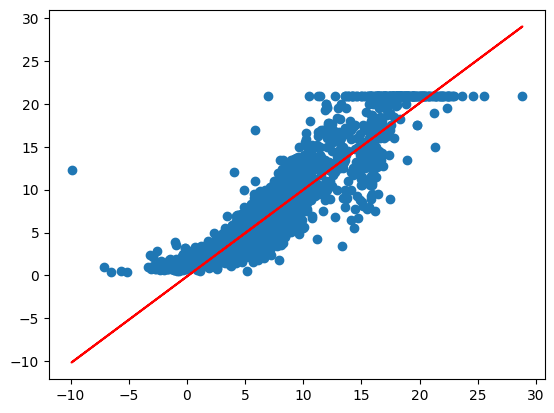

In [24]:
plt.scatter(y_pred,y_test)
m,b = np.polyfit(y_pred,y_test,1)
plt.plot(y_pred,m*y_pred + b , color = 'red')
plt.xlabel = ('predicted')
plt.ylabel = ('actual')
plt.title = ('Actual Price vs Predicted Price')
plt.show()
